# **1 Задание**

**Текст задания**: Сгенерировать наборы данных.Для каждого набора данных:

• Обучить и протестировать KNN

• Построить графики точности (train/test) при разных k (1...8)

• Построить границы классов


◀ Есть навигация по заданиям

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sortedcontainers import SortedList
from future.utils import iteritems
from mlxtend.plotting import plot_decision_regions

Для начала я сделала возможным отобразить все 3 графика горизонтально с помощью `fig` и `add_subpot`. Дальше настраивала функции для получения значений датасета как на примере из задания (`make_circles`, `make_blobs`, `make_moons`). И с помощью метода `scatter` происходит построение графиков. Самым проблемным был второй график, т.к. для него пришлось найти и подобрать правильные 4 центра.

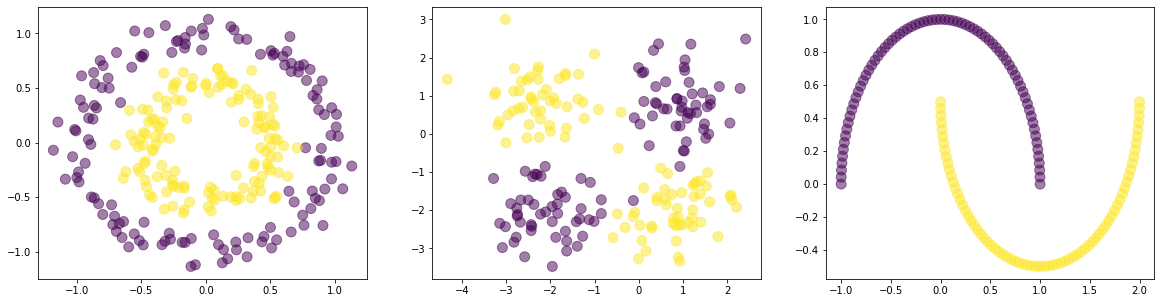

In [ ]:
from IPython.core.pylabtools import figsize
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig = plt.figure(figsize=(20,5))
ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

X1, y1 = make_circles(n_samples=270, noise=0.099, factor=0.53)
ax_1.scatter(X1[:,0], X1[:,1], s=100, c=y1, alpha=0.5)

centers1 = [[1, 1], [1, -2]]
centers2 = [[-2,1],[-2,-2]]
X2_1, y2_1 = make_blobs(n_samples=100, centers=centers1, cluster_std=0.7)
X2_2, y2_2 = make_blobs(n_samples=100, centers=centers2, cluster_std=0.7)
i = np.where(y2_2 == 0)
j = np.where(y2_2 == 1)
y2_2.flat[i] = 1
y2_2.flat[j] = 0
X2 = np.concatenate((X2_1,X2_2))
y2 = np.concatenate((y2_1,y2_2))
ax_2.scatter(X2[:,0], X2[:,1], s=100, c=y2, alpha=0.5)

X3, y3 = make_moons(n_samples=150)
ax_3.scatter(X3[:,0], X3[:,1], s=100, c=y3, alpha=0.5)

Класс KNN, с которым будет происходить работа. Класс был взят с лекции по KNN. Подумала, что в задании нужно использовать его, а не сторонние библиотеки.

In [ ]:
class KNN:

  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    y = np.zeros(len(X))
    for i, x in enumerate(X):
      sl = SortedList()
      for j, x_train in enumerate(self.X):
        diff = x - x_train
        d = diff.dot(diff)
        if (len(sl) < self.k):
          sl.add( (d, self.y[j]) )
        else:
          if (d < sl[-1][0] ):
            del sl[-1]
            sl.add( (d, self.y[j]) )

      votes = {}
      for _, v in sl:
          votes[v] = votes.get(v, 0) + 1


      max_votes = 0
      max_votes_class = -1
      for v, count in iteritems(votes):
          if count > max_votes:
              max_votes = count
              max_votes_class = v
      y[i] = max_votes_class
    return y

  def score(self, X, y):
    P = self.predict(X)
    return np.mean(P == y)

Для первого набора данных рассчитала правильное количество элементов для обучения и тестирования. В целом получилось 80% элементов для обучения, остальные 20% для тестирования.

In [ ]:
X_train1, y_train1 = X1[:216], y1[:216]
X_test1, y_test1 = X1[216:], y1[216:]

Обучение и тстирование с помощью метода `predict`. Для нахождения правильного количества ближаших сосдей использовался массив `error_rates`, в который записывалось среднее значение элементов, которые не совпали с правильными значениями.

In [ ]:
error_rates = []

for i in np.arange(1, 9):
    model1 = KNN(k=i)
    model1.fit(X_train1, y_train1)
    y_pred = model1.predict(X_test1)
    error_rates.append(np.mean(y_pred != y_test1))
print(error_rates)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Построение графика точности для `y_test1` для элементов от 1 до 8.

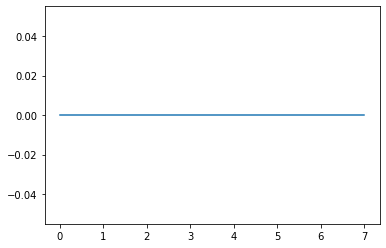

In [ ]:
plt.plot(error_rates)

Построение границ для тестовой выборки.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


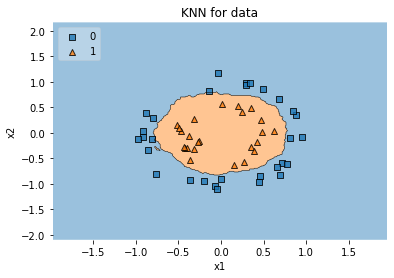

In [ ]:
plot_decision_regions(X_test1, y_test1, clf=model1, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

Построение границ для обучающей выборки.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


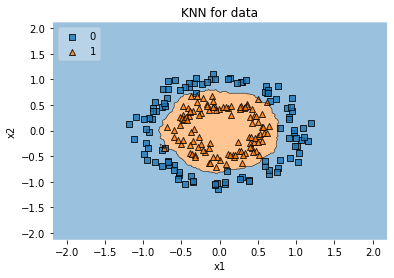

In [ ]:
plot_decision_regions(X_train1, y_train1, clf=model1, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

Для сравнения проделаю то же самое с помощью библиотеки scikit-learn и класса KNeighborsClassifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rates = []
for i in np.arange(1, 9):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train1, y_train1)
    new_predictions = new_model.predict(X_test1)
    error_rates.append(np.mean(new_predictions != y_test1))
print(error_rates)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


В итоге получилось, что значения `error_rates` не изменились, что означает, что алгоритм правильно находит границы

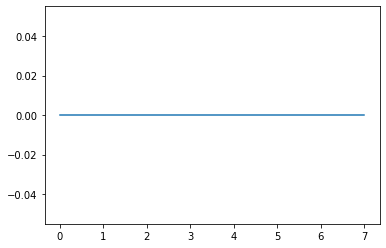

In [ ]:
plt.plot(error_rates)

Для второго набора данных проделываю ту же самую рабооту, что и для первого набора данных.

In [ ]:
X_train2, y_train2 = X2[:160], y2[:160]
X_test2, y_test2 = X2[160:], y2[160:]

In [ ]:
error_rates = []

for i in np.arange(1, 9):
    model1 = KNN(k=i)
    model1.fit(X_train2, y_train2)
    y_pred = model1.predict(X_test2)
    error_rates.append(np.mean(y_pred != y_test2))
print(error_rates)

[0.075, 0.075, 0.075, 0.05, 0.05, 0.05, 0.1, 0.05]


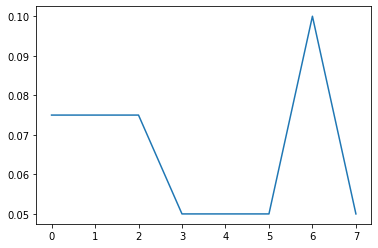

In [ ]:
plt.plot(error_rates)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


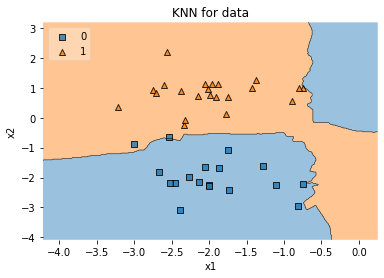

In [ ]:
plot_decision_regions(X_test2, y_test2, clf=model1, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


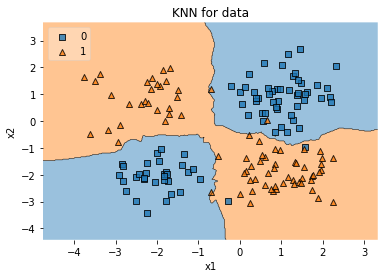

In [ ]:
plot_decision_regions(X_train2, y_train2, clf=model1, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

Для сравнения использовала модуль scikit-learn. В этот раз значения изменились. И класс KNeighborsClassifier вычисляет лучше, чем класс KNN.

In [ ]:
error_rates = []
for i in np.arange(1, 9):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train1, y_train1)
    new_predictions = new_model.predict(X_test1)
    error_rates.append(np.mean(new_predictions != y_test1))
print(error_rates)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


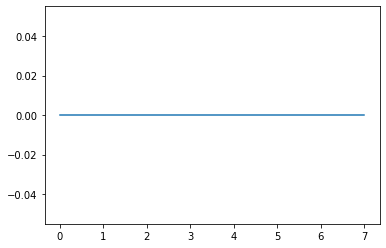

In [ ]:
plt.plot(error_rates)

Третий набор данных также аналогичен второму и первому.

In [ ]:
X_train3, y_train3 = X3[:120], y3[:120]
X_test3, y_test3 = X3[120:], y3[120:]

In [ ]:
error_rates = []

for i in np.arange(1, 9):
    model = KNN(k=i)
    model.fit(X_train3, y_train3)
    y_pred = model.predict(X_test3)
    error_rates.append(np.mean(y_pred != y_test3))
print(error_rates)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


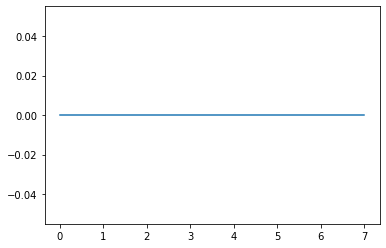

In [ ]:
plt.plot(error_rates)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


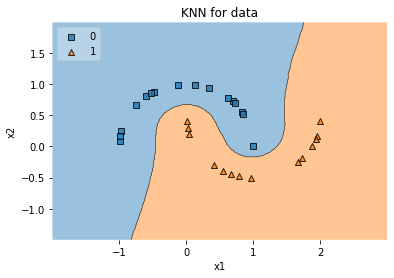

In [ ]:
plot_decision_regions(X_test3, y_test3, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


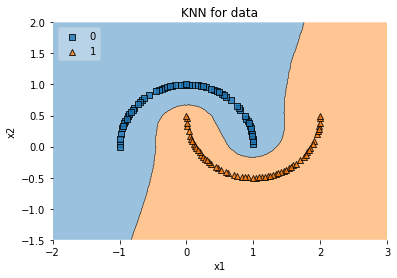

In [ ]:
plot_decision_regions(X_train3, y_train3, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

Здесь я не стала сравнивать, потому что результат будет очевидным

#2 Задание

**Текст задания**: Переписать класс KNN, заменим операции в цикле на векторные вычисления(используйте библиотеку numpy)

Честно, я поменяла только 1 строку для подсчета расстояния от точки до точки с помощью метода `linalg.norm`. Так как цикл останется, если не использовать сторонние бибилиотеки.

In [ ]:
class KNN:

  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):

    y = np.zeros(len(X))

    y = [x for i, x in enumerate(X)]

    for i, x in enumerate(X):
      sl = SortedList()
      for j, x_train in enumerate(self.X):
        d = np.linalg.norm(x-x_train)#та самая строчка
        if (len(sl) < self.k):
          sl.add((d, self.y[j]))
        else:
          if (d < sl[-1][0] ):
            del sl[-1]
            sl.add((d, self.y[j]))


      votes = {}
      for _, v in sl:
          votes[v] = votes.get(v, 0) + 1


      max_votes = 0
      max_votes_class = -1
      for v, count in iteritems(votes):
          if count > max_votes:
              max_votes = count
              max_votes_class = v
      y[i] = max_votes_class
    return y

  def score(self, X, y):
    P = self.predict(X)
    return np.mean(P == y)

Для иллюстрации работы класса вновь использую первый набор данных из первого задания, в котором предыдущий класс показал результаты лучше, чем измененный.

In [ ]:
error_rates = []
for i in np.arange(1, 9):
    model1 = KNN(k=i)
    model1.fit(X_train1, y_train1)
    y_pred = model1.predict(X_test1)
    error_rates.append(np.mean(y_pred != y_test1))
print(error_rates)

[0.037037037037037035, 0.037037037037037035, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# **3 Задание**

Текст задания: 25 объектов классифицированы на 3 класса

```
C="Cat"
F="Fish"
H="Hen"
#истинные значения:
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
#результат системы:
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]
```
Написать код на python, который воспроизводит вывод, представленный на картинке (не используя сторонние библиотеки, кроме numpy).


Для начала объявляю все необходимые переменные.

In [ ]:
C = "Cat"
F = "Fish"
H = "Hen"

y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

Для того, чтобы вычислить `precision`, `recall` и `f1-score` использую векторные вычисления (в код я добавила комментарии)б в частности: `around` для округления вычисленного значения, `diagonal` для для получения получения значений TP (положительных), `sum` для суммирования значенийй по осям (`precision - axis=0, recall - axis=1`), `size` для вычисления количества элементов массива.

Переменные `macro`- и `weighted-` высчитывались одинаково для каждой метрики и в целом их можно было вынети в отдельный общий метод. `f1-score` использовал уже ранее вычисленные массивы `precision` и `recall`.

In [ ]:
#вычисление количества уникальных элементов в y_pred по слайсам, основанным на y_true
unigue_1, count_1 = np.unique(y_pred[:6], return_counts=True)
unigue_2, count_2 =  np.unique(y_pred[6:15], return_counts=True)
unigue_3, count_3 = np.unique(y_pred[15:], return_counts=True)
count_2 += [0,1,0]
count_3 -= [0,1,0]
#объединение массивов в один двухмерный массив
arr_all_elem = np.vstack((count_1, count_2, count_3))
print('Матрица уникальных значений')
print(arr_all_elem)

#округление до 3х знаков после запятой
#диагональные элементы делятся на сумму элементов при axis=0
precision = np.around(np.diagonal(arr_all_elem) / np.sum(arr_all_elem, axis=0), decimals=3)
#вычисление среднего значения для всех элементов путем их суммирования и деления на их количество
macro_precision = np.around(np.sum(precision)/np.size(precision), decimals=3)
#взвешенное значение получается путем умножения на веса - количество элементов в группе - и делением получившейся суммы на сумму весов - 25
weighted_precision = np.around(np.sum(np.sum(arr_all_elem, axis=1)*precision)/np.sum(np.sum(arr_all_elem, axis=1)), decimals=3)
print('-----------------------------------------')
print('precision: ', precision)
print('macro_precision:    ', macro_precision)
print('weighted_precision: ', weighted_precision)
print('-----------------------------------------')

#диагональные элементы делятся на сумму элементов при axis=1
recall = np.around(np.diagonal(arr_all_elem) / np.sum(arr_all_elem, axis=1), decimals=3)
macro_recall = np.around(np.sum(recall)/np.size(recall), decimals=3)
weighted_recall = np.around(np.sum(np.sum(arr_all_elem, axis=1)*recall)/np.sum(np.sum(arr_all_elem, axis=1)), decimals=3)
print('recall:    ', recall)
print('macro_recall:       ', macro_recall)
print('weighted_recall:    ', weighted_recall)
print('-----------------------------------------')

#f1 находится путем умножения precision и recall и делением на их сумму
f1 = np.around(2 * precision * recall / (precision + recall), decimals=3)
macro_f1 = np.around(np.sum(f1)/np.size(f1), decimals=3)
weighted_f1 = np.around(np.sum(np.sum(arr_all_elem, axis=1)*f1)/np.sum(np.sum(arr_all_elem, axis=1)), decimals=3)
print('f1:        ', f1)
print('macro_f1:           ', macro_f1)
print('weighted_f1:        ', weighted_f1)


Матрица уникальных значений
[[4 1 1]
 [6 2 2]
 [3 0 6]]
-----------------------------------------
precision:  [0.308 0.667 0.667]
macro_precision:     0.547
weighted_precision:  0.581
-----------------------------------------
recall:     [0.667 0.2   0.667]
macro_recall:        0.511
weighted_recall:     0.48
-----------------------------------------
f1:         [0.421 0.308 0.667]
macro_f1:            0.465
weighted_f1:         0.464


Спасибо за проверку домашнего задания ✌